# Projekt PRiAD : Rozpoznawanie gestów na podstawie pomiarów aktywności mięśni z wykorzystaniem danych z serwisu Kaggle.

## Opis problemu:

Arek chcesz to zrobić ? 

## Analiza dostępnych danych
Określenie liczby obiektów, liczby klas, zakresy zmienności poszczególnych atrybutów, ich wartości statystycznych, poziom wypełnienia kolumn, ilość unikalnych danych.

Importowanie potrzebnych bibliotek i wczytanie danych, stworzenie jednego dużego zbioru danych.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


frames = [pd.read_csv("data/" + str(f) + ".csv") for f in range(0, 4)]
columns = [("m"+str(m) + "s" + str(s)) for s in range(1,9)for m in range(1,9)] + ["class"]
for frame in frames:
    frame.columns = columns
df = pd.concat(frames, sort=False)

Określenie liczby obiektów:

In [14]:
num_of_objects = len(df.index)
print("liczba obiektów: ", num_of_objects)

liczba obiektów:  11674


Określenie liczby klas:

In [15]:
num_of_classes = len(df['class'].unique())
print("liczba klas: ", num_of_classes)

liczba klas:  4


Zbadanie zakresu wartości atrybutów:

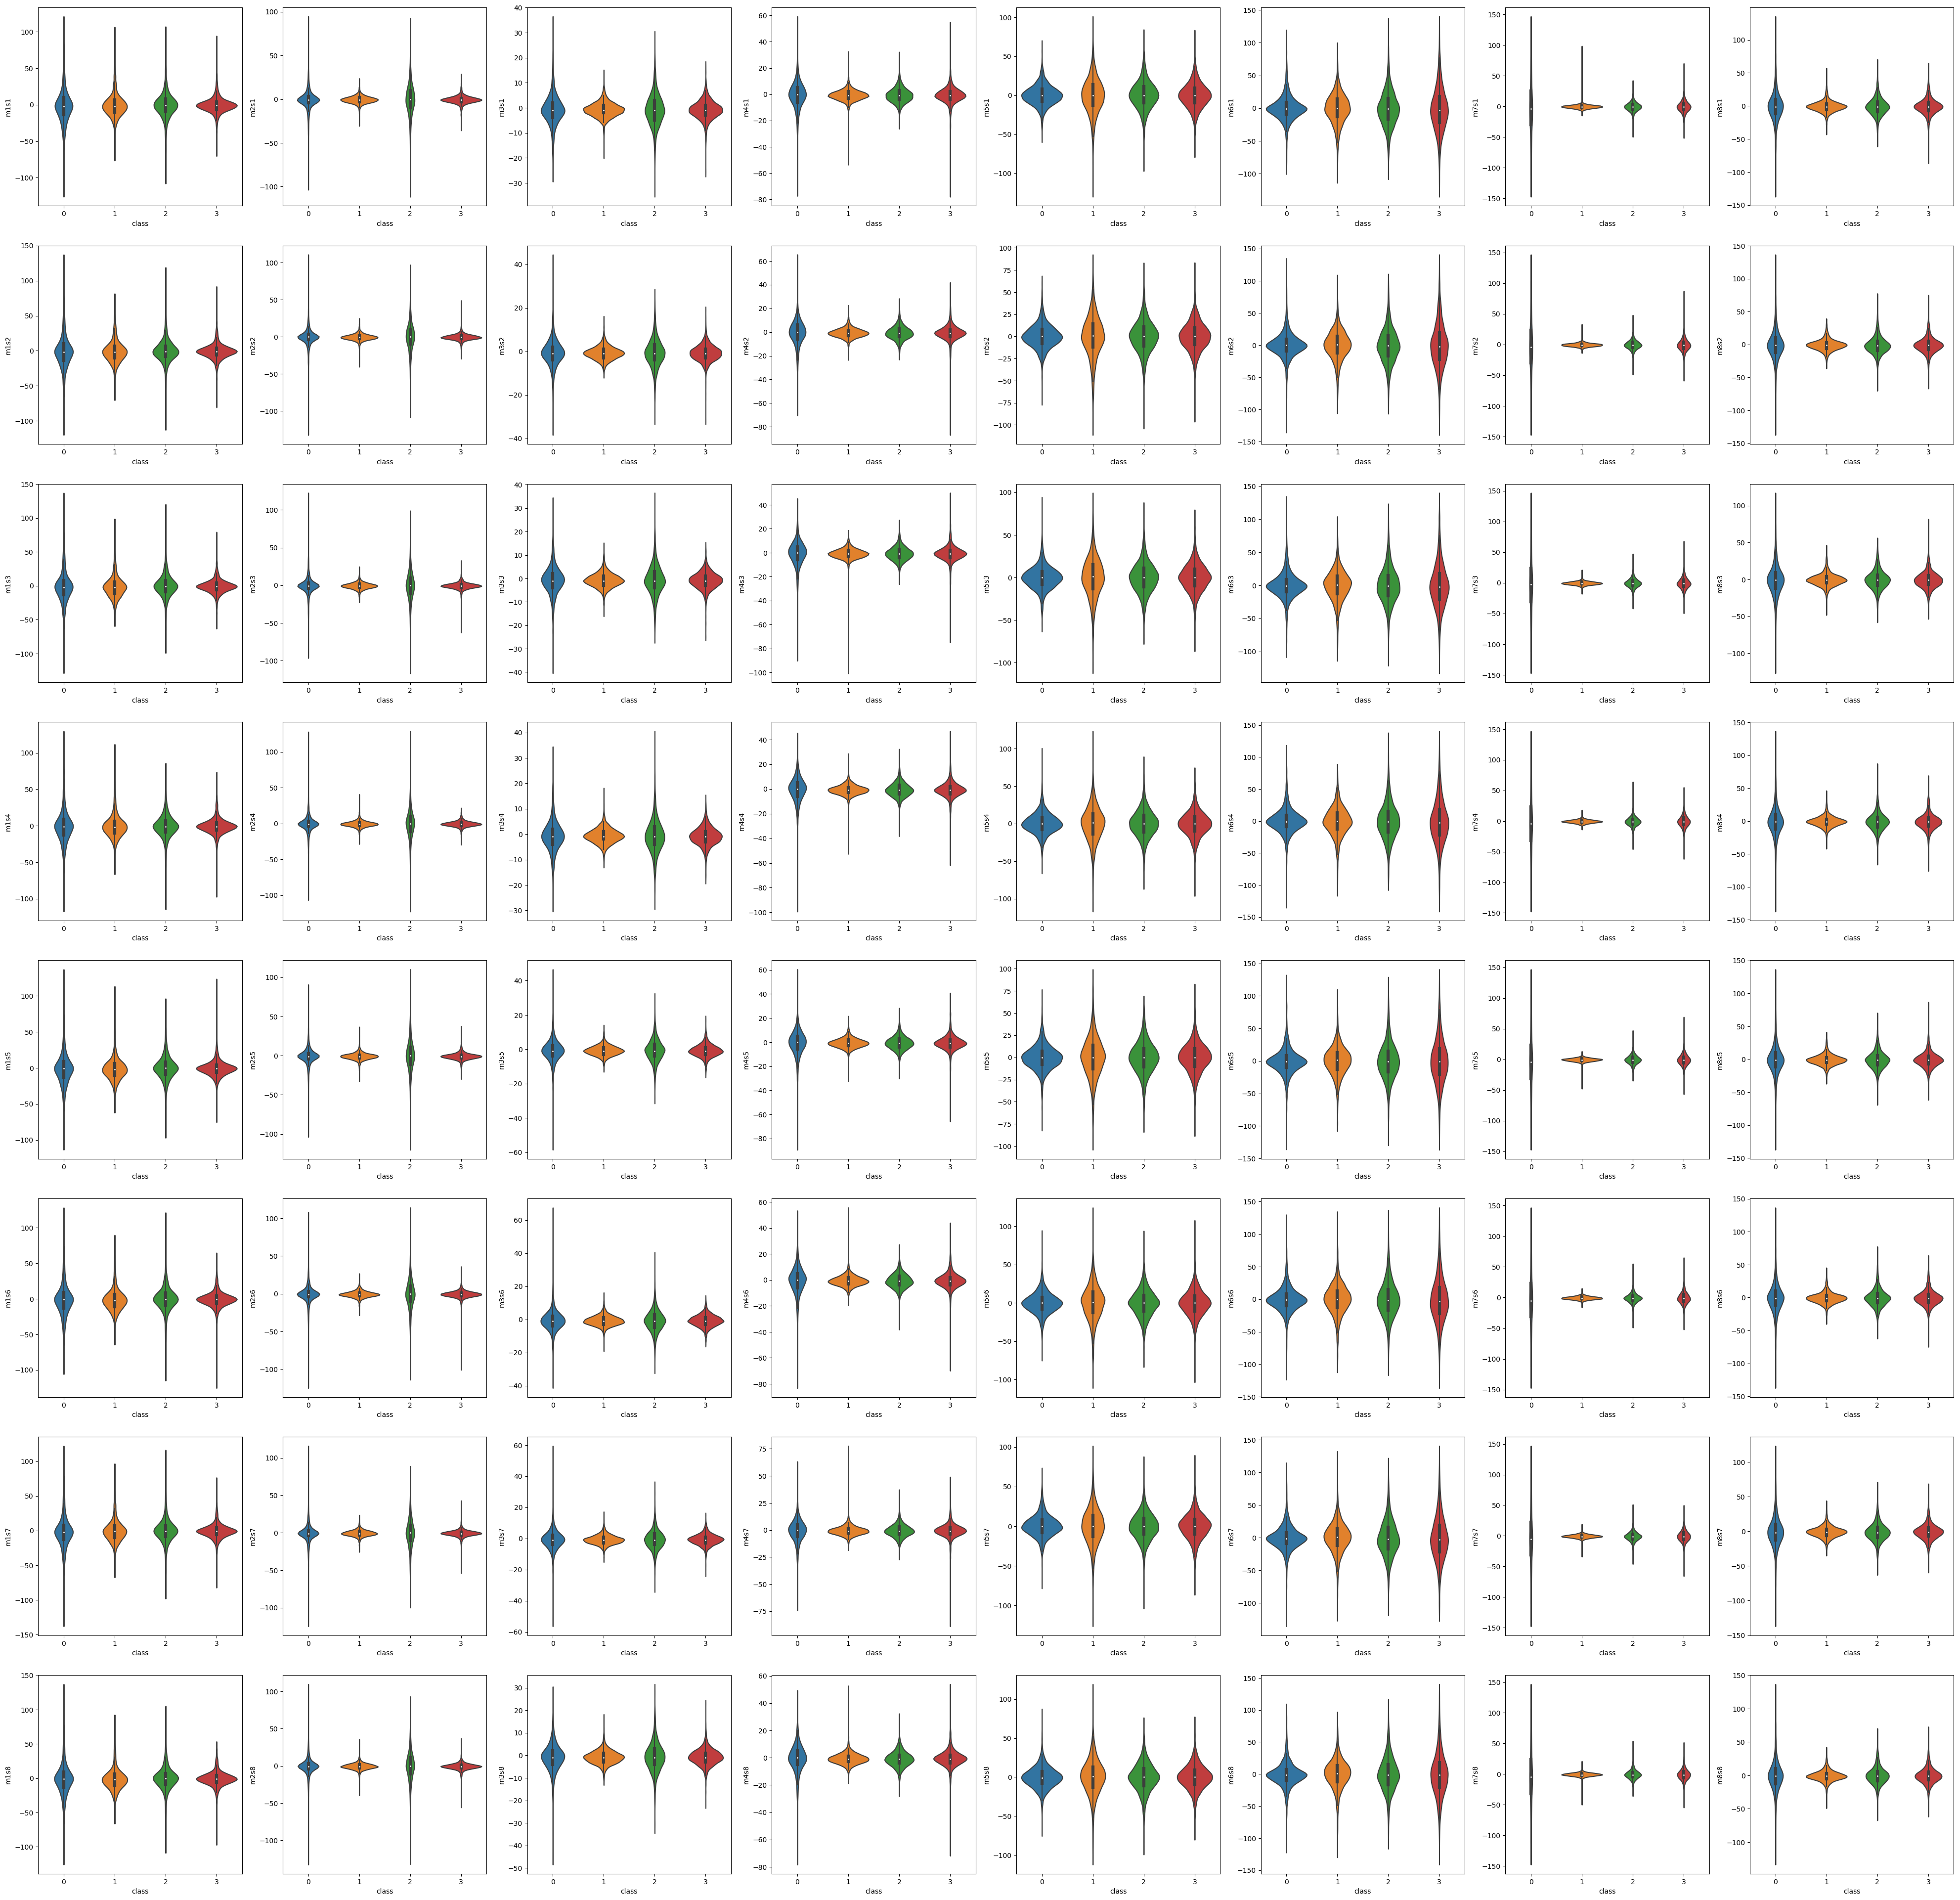

In [16]:
plt.figure(figsize=(50,50), dpi = 100)
for i in range(1,65):
    plt.subplot(8,8,i)
    sns.violinplot(x=df['class'], y=df.columns[i-1], data=df)

Zbadanie wartości statystycznych:

In [5]:
df_without_class = df.drop(['class'], axis=1)
df_without_class.describe()

m1s1          m2s1          m3s1          m4s1          m5s1  \
count  11674.000000  11674.000000  11674.000000  11674.000000  11674.000000   
mean      -0.520644     -0.728199     -0.738393     -0.729998     -0.159757   
std       18.567059     11.767147      4.989693      7.442282     17.852132   
min     -116.000000   -104.000000    -33.000000    -75.000000   -121.000000   
25%       -9.000000     -4.000000     -3.000000     -4.000000    -10.000000   
50%       -1.000000     -1.000000     -1.000000     -1.000000      0.000000   
75%        7.000000      3.000000      2.000000      3.000000     10.000000   
max      111.000000     90.000000     34.000000     55.000000     92.000000   

               m6s1          m7s1          m8s1          m1s2          m2s2  \
count  11674.000000  11674.000000  11674.000000  11674.000000  11674.000000   
mean      -0.552253     -1.262978     -0.654960     -0.665667     -0.652390   
std       25.810290     25.074413     15.398179     18.126643     11.841696   
min     -122.000000   -128.000000   -128.000000   -110.000000   -128.000000   
25%      -15.000000     -6.000000     -8.000000     -9.000000     -4.000000   
50%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
75%       13.000000      4.000000      6.000000      6.000000      3.000000   
max      127.000000    127.000000    126.000000    127.000000    106.000000   

       ...          m7s7          m8s7          m1s8          m2s8  \
count  ...  11674.000000  11674.000000  11674.000000  11674.000000   
mean   ...     -1.624893     -0.931043     -0.839644     -0.740278   
std    ...     25.296251     15.158873     18.197682     12.007060   
min    ...   -128.000000   -128.000000   -116.000000   -128.000000   
25%    ...     -6.000000     -8.000000     -9.000000     -4.000000   
50%    ...     -1.000000     -1.000000     -1.000000     -1.000000   
75%    ...      3.000000      6.000000      6.000000      3.000000   
max    ...    127.000000    114.000000    127.000000    105.000000   

               m3s8          m4s8          m5s8          m6s8          m7s8  \
count  11674.000000  11674.000000  11674.000000  11674.000000  11674.000000   
mean      -0.768717     -0.705671     -0.148278     -0.378020     -1.443807   
std        4.969706      7.385313     17.841925     25.553998     25.258353   
min      -46.000000    -74.000000   -103.000000   -128.000000   -128.000000   
25%       -3.000000     -4.000000    -10.000000    -14.000000     -6.000000   
50%       -1.000000     -1.000000      0.000000     -1.000000     -1.000000   
75%        2.000000      3.000000     10.000000     13.000000      3.000000   
max       29.000000     51.000000    110.000000    127.000000    127.000000   

               m8s8  
count  11674.000000  
mean      -0.609303  
std       15.531573  
min     -124.000000  
25%       -8.000000  
50%       -1.000000  
75%        6.000000  
max      127.000000  

[8 rows x 64 columns]

Zbadanie poziomu wypełnienia column:

In [6]:
x = df.isna().sum()
#nie wiem jak to jakoś ciekawiej przedstawić - może wykres ?
x.sum()

0

Zbadanie ilości unikalnych datych:

In [7]:
unique_values = [df[column].unique() for column in df.columns]
num_of_unique_values = sum([len(array) for array in unique_values])
print("Numer wartości unikalnych ", num_of_unique_values)

Numer wartości unikalnych  10443


Analiza korelacji między zmiennymi.

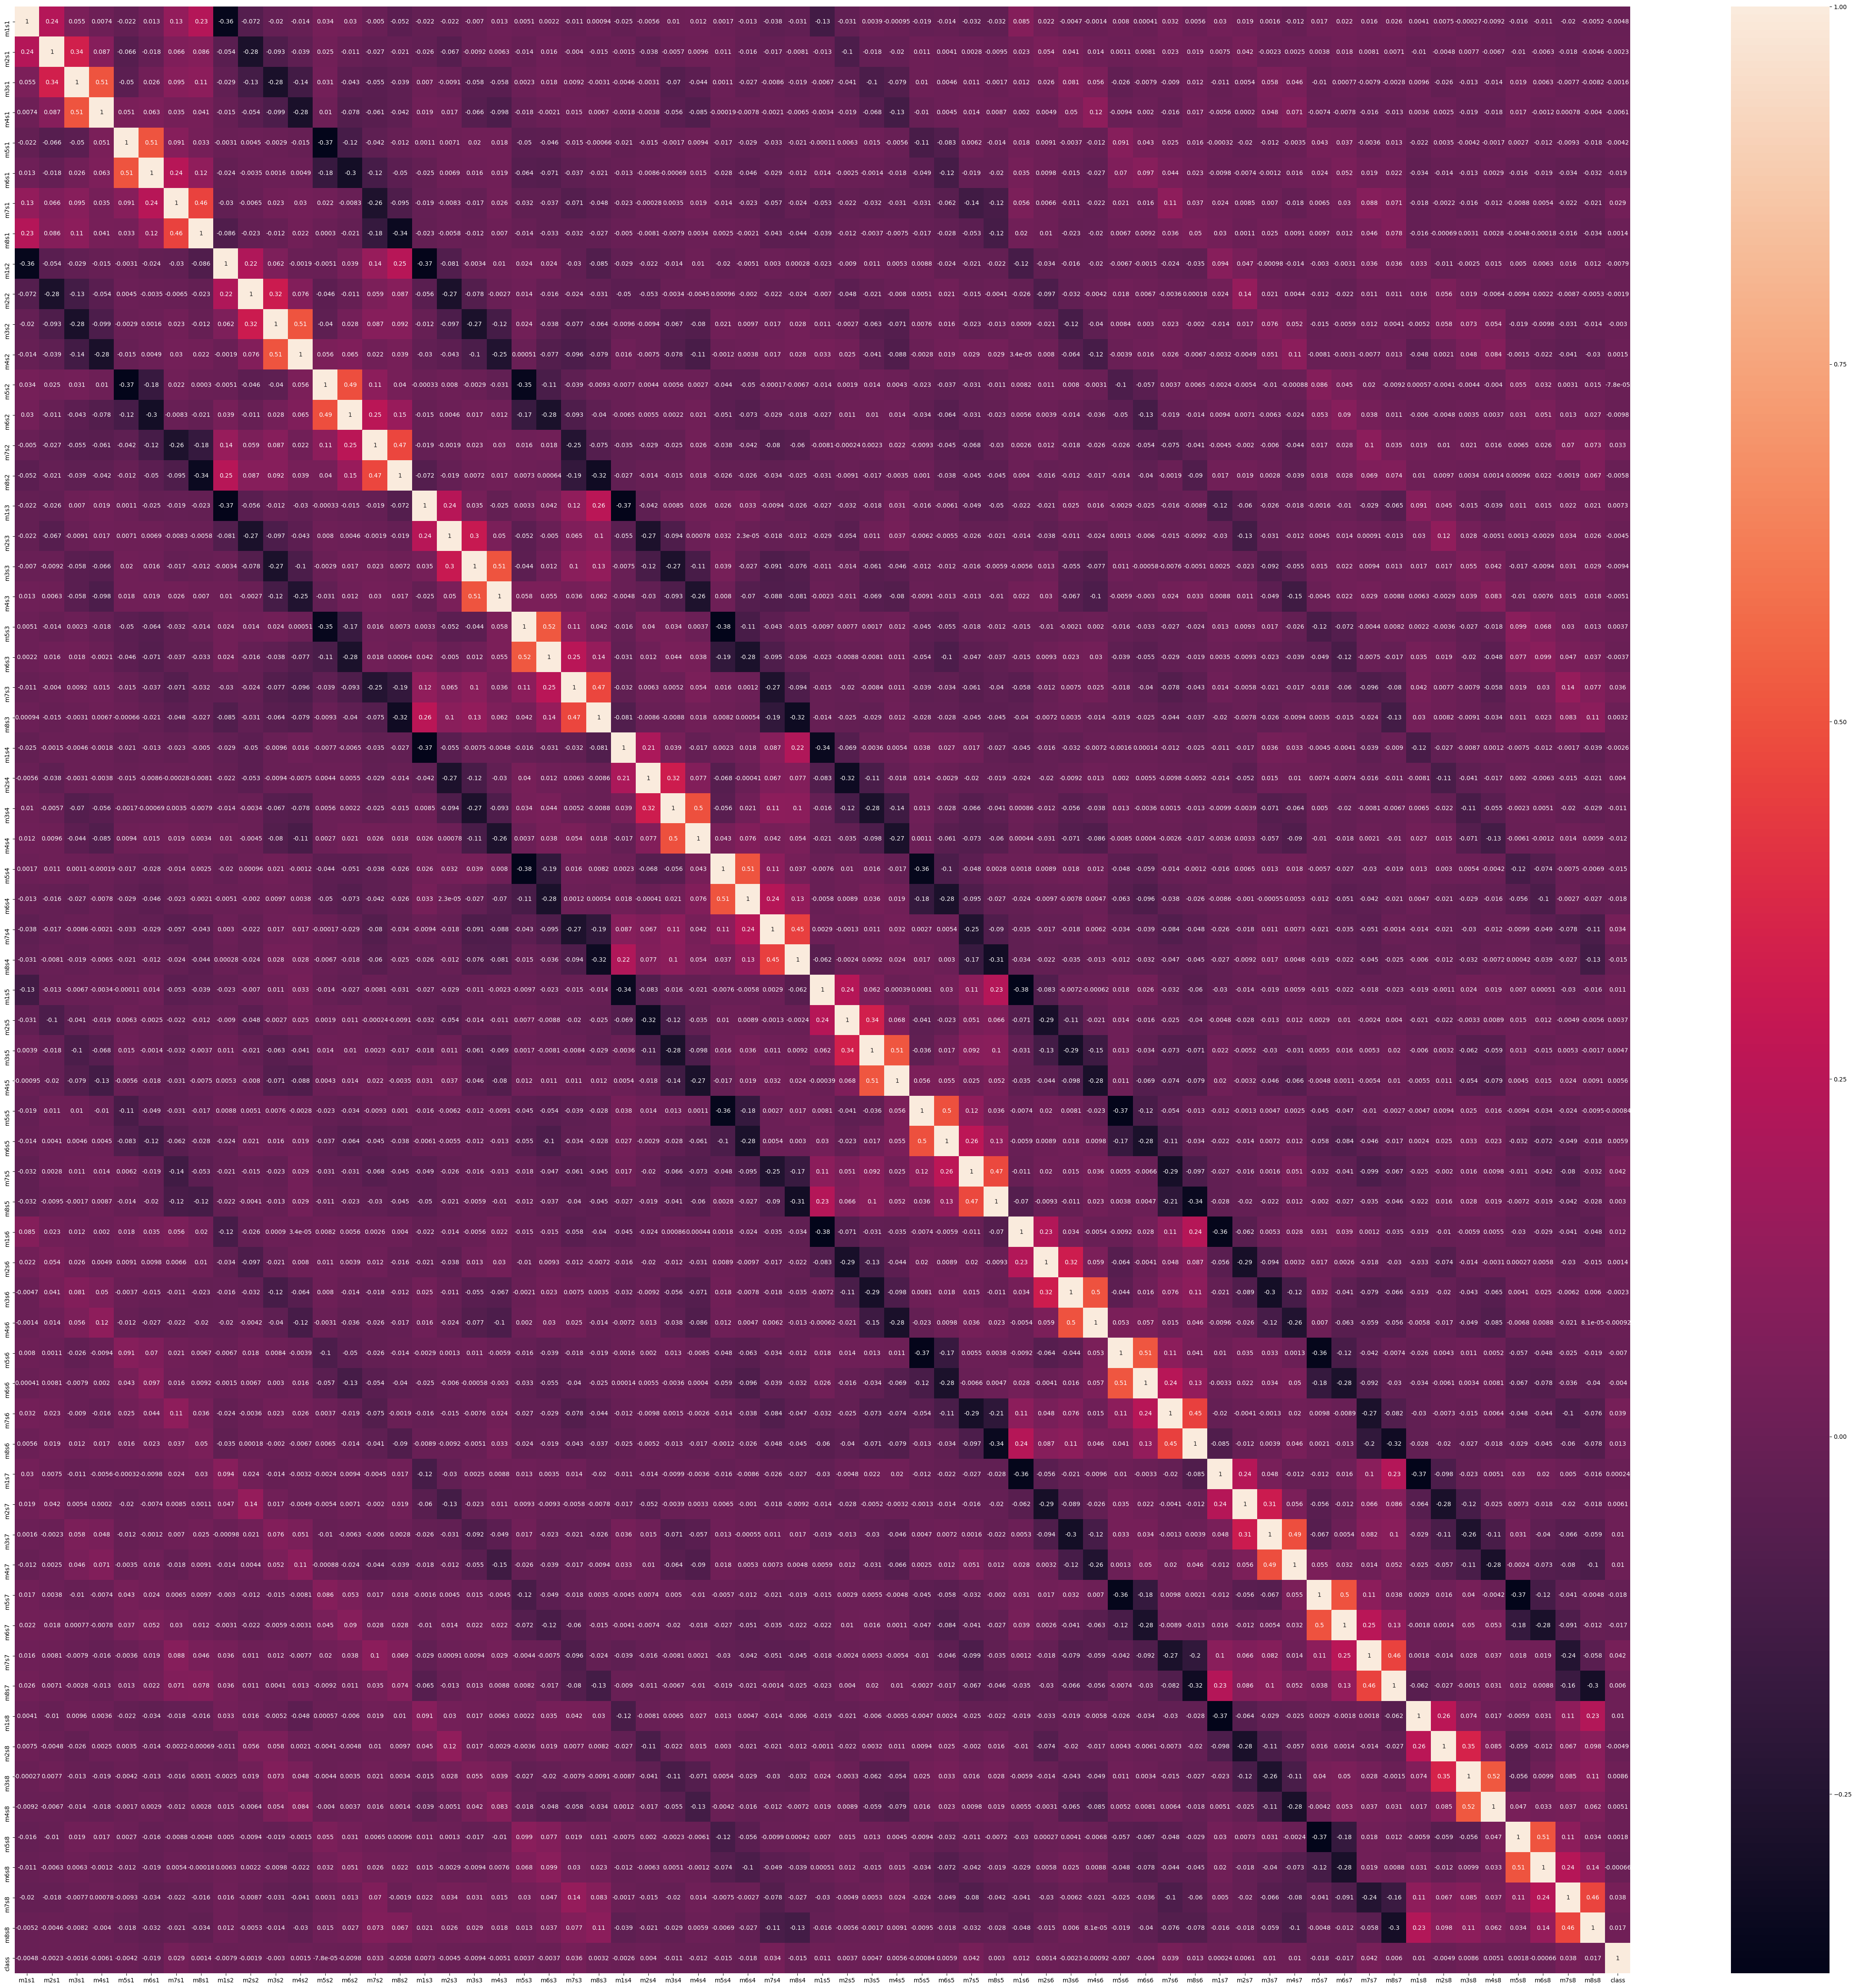

In [8]:
plt.figure(figsize=(60,60), dpi=100)
sns.heatmap(df.corr(), annot=df.corr())
plt.show()

## Przygotowanie danych
Imputowac brakujace dane lub usunąć rzadko wypełnione kolumny.

Wyciągając wnioski z poprzednich części, można stwierdzić, że nasze dane są kompletne. Nie mamy żadnych pustych pół do uzupełnienia, a korelacje pomiędzy kolumnami w ogólności są na tyle nie duże, że nie ma potrzeby manipulowania nimi.

## Grupowanie danych, analiza podobieństwa
Przeanalizować podobieństwo między danymi przy pomocy algorytmów grupowania wraz z analizą ilości grup.

Text(0.5, 1.0, 'wynik grupowania')

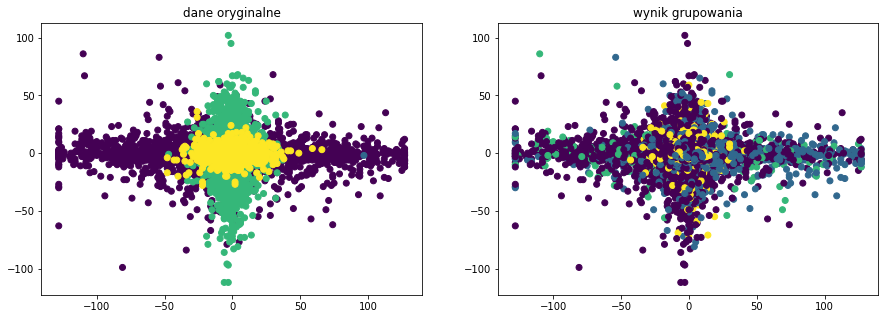

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from sklearn.cluster import AgglomerativeClustering
ile_grup = 4
do_grupowania = df


model = AgglomerativeClustering(n_clusters=ile_grup)
model.fit(do_grupowania)

klasa = df['class'].astype('category').cat.codes
grupa = model.labels_

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter( x=df['m7s1'], y=df['m2s5'], c=klasa)
plt.title('dane oryginalne')
plt.subplot(1,2,2)
do_grupowania['grupa']=  model.labels_
plt.scatter( x=do_grupowania['m7s1'], y=do_grupowania['m2s5'], c=grupa)
plt.title('wynik grupowania')

## Testowanie wybranych klasyfikatorów
Sprawdzenie wybranych klasyfikatorów pod kątem doboru ich parametrów.

## Ocena przydatności danych
Ocenienie czy do poprawnej klasyfikacji należy wykorzystać wszystkie atrybuty, czy wystarczy ich podzbiór, czy należy stworzyć jakieś nowe dane w oparciu o istniejące. 